<a href="https://colab.research.google.com/github/mgnarag/binarization-lowres/blob/main/Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/From Arki/"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from PIL import Image, ImageOps
Image.MAX_IMAGE_PIXELS = None
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

from tensorflow import keras

import time
import os
import cv2

In [4]:
def crop(im):
    width, height = im.size
    data = []
    for j in range(0,int(height/n_size)):
        for i in range(0,int(width/n_size)):
            im1 = im.crop((0 + (n_size*i), 0 + (n_size*j), n_size + (n_size*i), n_size + (n_size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data


In [11]:
gt = Image.open(file_path+ '4 Testing/ground_truth_100dpi.png').convert('L')
img_gt = cv2.imread(file_path+ '4 Testing/ground_truth_100dpi.png')
gt = np.asarray(gt) > 128
gt = ~gt

filename = "nbs_100dpi.png"
directory = file_path + '4 Testing/' + filename
#directory = 'test_output_v'+str(model)+'.png'
image = Image.open(directory)
rgb = image.convert("RGB")
r, g, b = rgb.split()
w_dirty, h_dirty = r.size
dirty = [r,g,b]


METRIC = []
channel = ['red','green', 'blue']
for model in range(1,2):
  for color in range(0,3):
      print('Model = ', model, '', str(channel[color]))
      from tensorflow import keras
      autoencoder = keras.models.load_model(file_path + '1 Models/100 DPI/autoencoder_'+str(model)+ '_'+str(channel[color]))
      if model == 1:
          n_size = 32
      if model == 2:
          n_size = 32
      if model == 3:
          n_size = 64
      if model == 4:
          n_size = 64
      if model == 5:
          n_size = 128
      if model == 6:
          n_size = 128

      xx = int(w_dirty/n_size)
      final=[]

      for portion in range(0,xx):
          test = dirty[color]
          im1 = test.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty))
          w1, h1 = im1.size
          w = int(w1/n_size)
          h = int(h1/n_size)

          neverbeforeseen = np.array(crop(im1))
          encoded_imgs = autoencoder.encoder(neverbeforeseen).numpy()
          decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

          col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
          for i in range(2,h):
              col = np.vstack((col,decoded_imgs[i]))

          #y = np.where(col > 0.5,1,0) #round the values
          y = col
          y = (y * 255).astype('uint8')
          if portion == 0:
              final = y
          if portion > 0:
              final = np.hstack((final,y))

      final = np.squeeze(final)
      reconstructed = Image.fromarray(final)
      reconstructed.save(file_path + "5 Tested/output v" + str(model) + '_'+str(channel[color]) + '.png')

      output = Image.open(file_path + "5 Tested/output v" + str(model)  + '_'+str(channel[color]) +  '.png').convert('L')  # convert to grayscale

  #COMBINING RGB ------------------------------------------------
  print('Model = ', model, '', str('RGB'))
  mask_red = 1-np.asarray(Image.open(file_path + "5 Tested/output v" + str(model)  + '_'+str(channel[0]) +  '.png').convert('L'))/255
  mask_green = 1-np.asarray(Image.open(file_path + "5 Tested/output v" + str(model)  + '_'+str(channel[1]) +  '.png').convert('L'))/255
  mask_blue = 1-np.asarray(Image.open(file_path + "5 Tested/output v" + str(model)  + '_'+str(channel[2]) +  '.png').convert('L'))/255
  out_red = mask_red*r
  out_green = mask_green*g
  out_blue = mask_blue*b


  reconstructed = Image.fromarray(output_rgb)
  reconstructed.save(file_path + "5 Tested/output v" + str(model) + '_RGB.png')

  output = Image.open(file_path + "5 Tested/output v" + str(model)  + '_RGB.png').convert('L')  # convert to grayscale



Model =  1  red
Model =  1  green
Model =  1  blue
Model =  1  RGB


NameError: ignored

[[0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.00392157 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]]


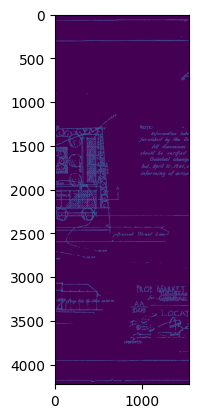

In [22]:
mask_red = 1-np.asarray(Image.open(file_path + "5 Tested/output v" + str(model)  + '_'+str(channel[0]) +  '.png').convert('L'))/255
out_red = mask_red*r
print(mask_red)
plt.imshow(out_red)

In [23]:
print(out_red)

[[0.         0.         0.         ... 0.68235294 0.68235294 0.68235294]
 [0.         0.         0.         ... 0.6745098  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.85490196 0.85882353 0.85882353 ... 0.         0.         0.        ]]


In [ ]:
TP = output & gt
TP = Image.fromarray(~TP)
plt.imshow(TP,cmap = 'gray')
TP.save(file_path + "5 Tested/TP.png")

FP = output & ~gt
FP = Image.fromarray(~FP)
plt.imshow(FP,cmap = 'gray')
FP.save(file_path + "5 Tested/FP.png")

FN = ~output & gt
FN = Image.fromarray(~FN)
plt.imshow(FN,cmap = 'gray')
FN.save(file_path + "5 Tested/FN.png")